## Среднее число конверсий

0.006 green
0.0058
0.19022982041765069


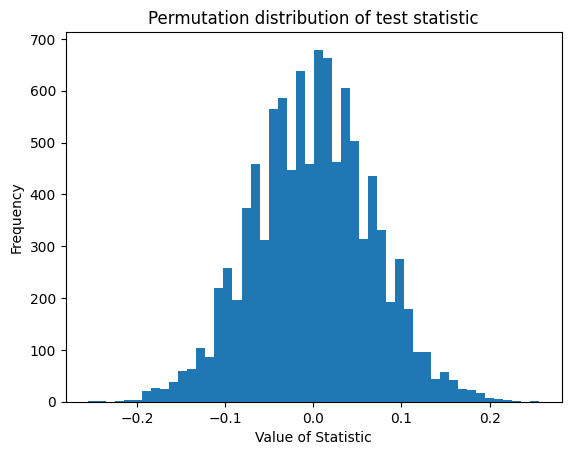

In [5]:
from scipy.stats import permutation_test
import pandas as pd
import numpy as np

alpha = 0.05

exp_testid = 33476
control_testid = 33477


def revenues_by_user(df: pd.DataFrame) -> pd.DataFrame:
    return df.groupby(["userid"]).agg(
        userid=pd.NamedAgg(column="userid", aggfunc="first"),
        converse=pd.NamedAgg(column="converse", aggfunc="sum"),
    ).reset_index(drop=True)


def statistic_arpu(a, b):
    return np.mean(a) - np.mean(b)


def process(fname: str):
    df = pd.read_csv(fname, delimiter="\t")

    df["converse"] = df["action"].apply(lambda x: 1.0 if x == "confirmation" else 0.0)
    df.drop(["timestamp", "action", "value"], axis=1, inplace=True)
    
    df_exp = df[df["testids"].str.contains(str(exp_testid))].drop(["testids"], axis=1)
    df_control = df[df["testids"].str.contains(str(control_testid))].drop(["testids"], axis=1)
    
    df_exp = revenues_by_user(df_exp)
    df_control = revenues_by_user(df_control)

    np.random.seed(177)
    result = permutation_test((df_exp["converse"], df_control["converse"]), statistic_arpu, permutation_type='independent')

    c = "red" if result.statistic < 0 else "green"
    print(round(result.pvalue, 3), c if result.pvalue < alpha else "gray")
    # show_hist(result)
    

if __name__ == '__main__':
    process(input())


In [4]:
from IPython.display import display
import matplotlib.pyplot as plt


def show_hist(result):
    print(result.pvalue)
    print(result.statistic)
    plt.hist(result.null_distribution, bins=50)
    plt.title("Permutation distribution of test statistic")
    plt.xlabel("Value of Statistic")
    plt.ylabel("Frequency")
    plt.show()